# House Price Prediction Notebook

This notebook will detail the analysis done for house price predictions. The dataset used in this exercise can be found on kaggle at: https://www.kaggle.com/datasets/yasserh/housing-prices-datasets

Dataset Description:
This dataset has 13 features:
- price: The price of the houses 
- area: The surface area covered by the house the house
- bedrooms: Number of bedrooms in the house
- bathrooms: Number of bathrooms
- stories: Number of floors/stories 
- mainraod: Whether or not the house is connected to a mainraod
- guestroom: Whether or not the house has a guestroom
- basement: Whether or not the hose has a basement
- hotwaterheating: Whether or not the house has a hot water heater
- airconditioning: Whether or not the house has ai conditioning
- parking: Number of house parkings
- prefarea: Whether or not the house is located in a preferred area or desirable neighborhood of a city or town
- furnishingstatus: Furnishing status of the house

## Importing libraries and Uploading the data

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


## Data Cleaning and Visualisation

In [73]:
data = pd.read_csv("Housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
data.shape

(545, 13)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [13]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [14]:
print(data.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [15]:
print("Duplicates:", data.duplicated().sum())
#data.drop_duplicates(inplace=True)

Duplicates: 0


In [41]:
# fix text inconsistency
# categorical_cols = data.select_dtypes(include=["object"]).columns
# for col in categorical_cols:data[col] = data[col].str.lower().str.strip()

data.columns = data.columns.str.lower().str.strip()

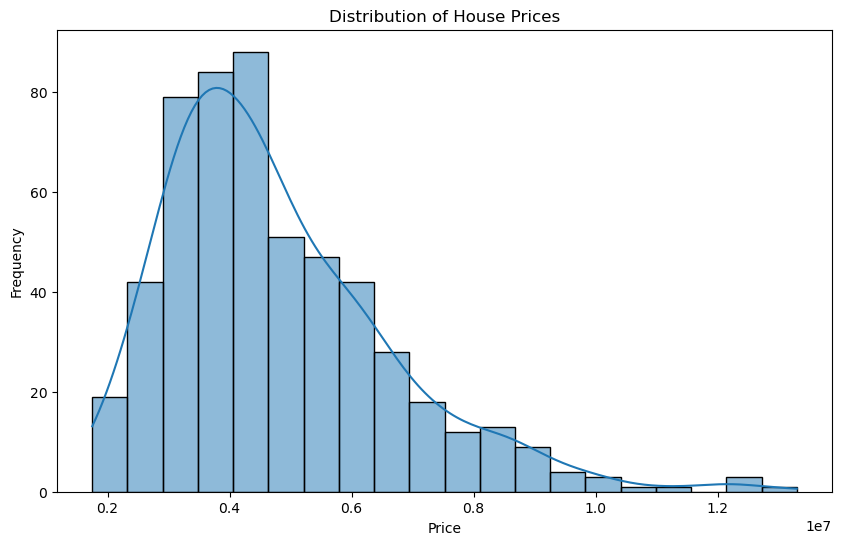

In [19]:
# ensuring the target variable is well distributed
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=20, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Data Encoding and feature engineering for Machine Learning Analysis

In [20]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [74]:
# Space efficiency features
data['area_per_bedroom'] = data['area'] / (data['bedrooms'] + 1)
data['area_per_story'] = data['area'] / (data['stories'] + 1)

In [75]:
# Comfort / intensity indicators
data['bathroom_to_bedroom_ratio'] = data['bathrooms'] / (data['bedrooms'] + 1)
data['parking_per_bedroom'] = data['parking'] / (data['bedrooms'] + 1)

In [82]:
data['area_x_bedrooms'] = data['area'] * data['bedrooms']
data['area_x_bathrooms'] = data['area'] * data['bathrooms']
data['stories_x_area'] = data['stories'] * data['area']


In [ ]:
# data['mainroad'] = data['mainroad'].map({'yes': 1, 'no': 0})
# data['guestroom'] = data['guestroom'].map({'yes': 1, 'no': 0})
# data['basement'] = data['basement'].map({'yes': 1, 'no': 0})
# data['hotwaterheating'] = data['hotwaterheating'].map({'yes': 1, 'no': 0})
# data['airconditioning'] = data['airconditioning'].map({'yes': 1, 'no': 0})
# data['prefarea'] = data['prefarea'].map({'yes': 1, 'no': 0})

In [ ]:
# data['furnishingstatus'] = data['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

In [89]:
categorical_cols = ['furnishingstatus', 'mainroad', 'airconditioning', 
                    'prefarea', 'basement', 'guestroom', 'hotwaterheating']

data_encoded = pd.get_dummies(
    data,
    columns=categorical_cols,
    drop_first=True,
    dtype=int
)

In [84]:
data_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,area_per_bedroom,area_per_story,bathroom_to_bedroom_ratio,parking_per_bedroom,...,area_x_bathrooms,stories_x_area,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,airconditioning_yes,prefarea_yes,basement_yes,guestroom_yes,hotwaterheating_yes
0,13300000,7420,4,2,3,2,1484.0,1855.000000,0.4,0.4,...,14840,22260,0,0,1,1,1,0,0,0
1,12250000,8960,4,4,4,3,1792.0,1792.000000,0.8,0.6,...,35840,35840,0,0,1,1,0,0,0,0
2,12250000,9960,3,2,2,2,2490.0,3320.000000,0.5,0.5,...,19920,19920,1,0,1,0,1,1,0,0
3,12215000,7500,4,2,2,3,1500.0,2500.000000,0.4,0.6,...,15000,15000,0,0,1,1,1,1,0,0
4,11410000,7420,4,1,2,2,1484.0,2473.333333,0.2,0.4,...,7420,14840,0,0,1,1,0,1,1,0


In [90]:
# Combined amenity signal
amenities = ['furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished', 'mainroad_yes', 'airconditioning_yes', 'prefarea_yes', 'basement_yes', 'guestroom_yes', 'hotwaterheating_yes']
data_encoded['amenity_score'] = data_encoded[amenities].sum(axis=1) 

In [91]:
# target normalisation
data_encoded['price'] = np.log1p(data_encoded['price'])

In [92]:
data_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,area_per_bedroom,area_per_story,bathroom_to_bedroom_ratio,parking_per_bedroom,...,stories_x_area,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,airconditioning_yes,prefarea_yes,basement_yes,guestroom_yes,hotwaterheating_yes,amenity_score
0,16.403275,7420,4,2,3,2,1484.0,1855.000000,0.4,0.4,...,22260,0,0,1,1,1,0,0,0,3
1,16.321037,8960,4,4,4,3,1792.0,1792.000000,0.8,0.6,...,35840,0,0,1,1,0,0,0,0,2
2,16.321037,9960,3,2,2,2,2490.0,3320.000000,0.5,0.5,...,19920,1,0,1,0,1,1,0,0,4
3,16.318175,7500,4,2,2,3,1500.0,2500.000000,0.4,0.6,...,15000,0,0,1,1,1,1,0,0,4
4,16.250001,7420,4,1,2,2,1484.0,2473.333333,0.2,0.4,...,14840,0,0,1,1,0,1,1,0,4


In [93]:
# feature scaling
scaler = StandardScaler()
X = data_encoded.drop(columns='price')
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(
    X_scaled,
    columns=X.columns,
    index=X.index
)

data_encoded_scaled = pd.concat([X_scaled, data_encoded['price']], axis=1)

In [94]:
data_encoded_scaled.head()

,area,bedrooms,bathrooms,stories,parking,area_per_bedroom,area_per_story,bathroom_to_bedroom_ratio,parking_per_bedroom,area_x_bedrooms,...,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,airconditioning_yes,prefarea_yes,basement_yes,guestroom_yes,hotwaterheating_yes,amenity_score,price
0,1.046726,1.403419,1.421812,1.378217,1.517692,0.272499,-0.126356,0.651387,1.031898,1.704315,...,-0.844888,-0.696429,0.405623,1.472618,1.804941,-0.734539,-0.465315,-0.219265,0.229968,16.403275
1,1.757010,1.403419,5.405809,2.532024,2.679409,0.809222,-0.186619,4.221846,1.947284,2.445470,...,-0.844888,-0.696429,0.405623,1.472618,-0.554035,-0.734539,-0.465315,-0.219265,-0.611191,16.321037
2,2.218232,0.047278,1.421812,0.224410,1.517692,2.025564,1.274991,1.544001,1.489591,1.728378,...,1.183588,-0.696429,0.405623,-0.679063,1.804941,1.361397,-0.465315,-0.219265,1.071128,16.321037
3,1.083624,1.403419,1.421812,0.224410,2.679409,0.300381,0.490619,0.651387,1.947284,1.742816,...,-0.844888,-0.696429,0.405623,1.472618,1.804941,1.361397,-0.465315,-0.219265,1.071128,16.318175
4,1.046726,1.403419,-0.570187,0.224410,1.517692,0.272499,0.465111,-1.133843,1.031898,1.704315,...,-0.844888,-0.696429,0.405623,1.472618,-0.554035,1.361397,2.149083,-0.219265,1.071128,16.250001


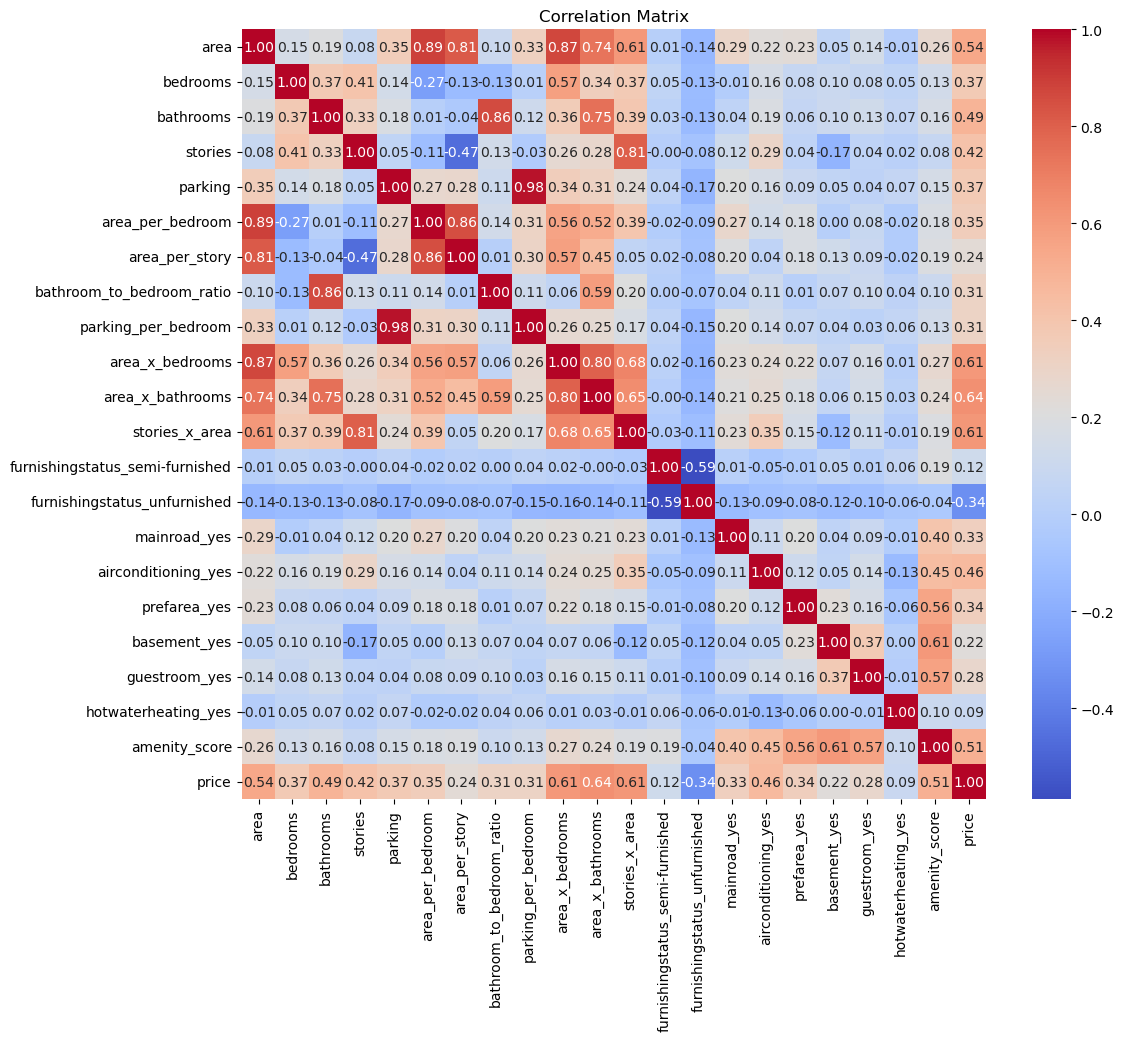

In [95]:
# Checking for multicollinearity
plt.figure(figsize=(12, 10))
correlation_matrix = data_encoded_scaled.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

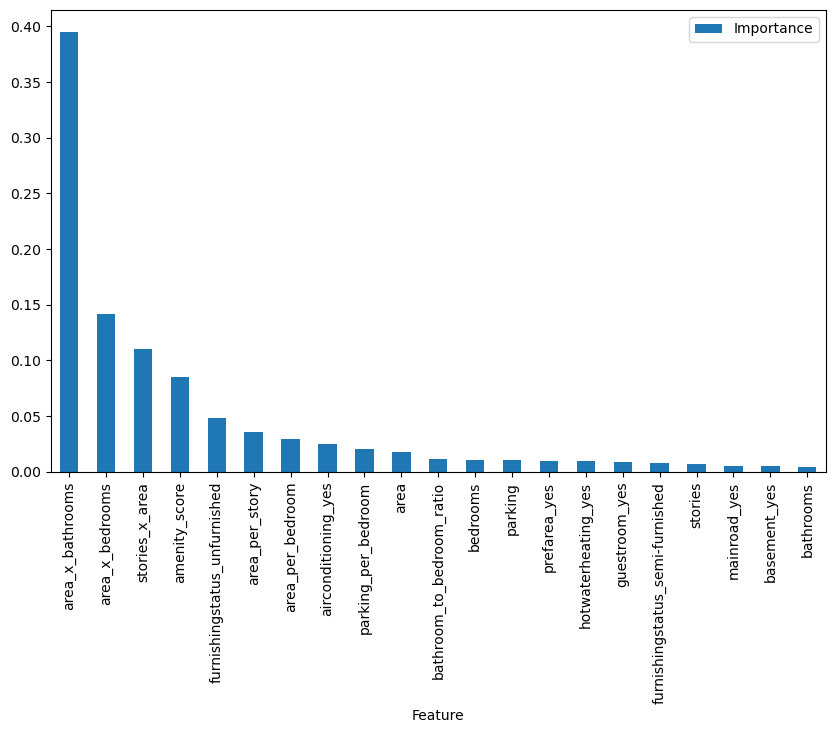

In [96]:
# look out for important features
X = data_encoded_scaled.drop('price', axis=1)
y = data_encoded_scaled['price']

model = RandomForestRegressor(random_state=42)
model.fit(X, y)
feature_importances = model.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df.set_index('Feature', inplace=True)
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False).plot(kind='bar', figsize=(10,6))
plt.show()
# print(feature_importances_df)

## Model Training and evaluation

In [97]:
# trainig the linear regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

In [98]:
# linear model accuracy
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression Model - MSE: {mse}, R2 Score: {r2}")

Linear Regression Model - MSE: 0.06424658067179072, R2 Score: 0.6672689790098818


In [99]:
# training the random forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [100]:
# random forest model accuracy
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Model - MSE: {mse_rf}, R2 Score: {r2_rf}")

Random Forest Model - MSE: 0.06807094071725593, R2 Score: 0.6474627385959048


In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42)

grid = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_rf = grid.best_estimator_

In [102]:
y_pred_best_rf = best_rf.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)
print(f"Best Random Forest Model - MSE: {mse_best_rf}, R2 Score: {r2_best_rf}")

Best Random Forest Model - MSE: 0.06971210385403347, R2 Score: 0.6389632063188337


In [103]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [104]:
# ridge model accuracy
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression Model - MSE: {mse_ridge}, R2 Score: {r2_ridge}")

Ridge Regression Model - MSE: 0.06385227508464462, R2 Score: 0.6693110752463097


## Results Visualisations (?)
